# Pushing the Limit in Controlled Difficulty
## Finding the hardest settings the Killing Floor 2 economy allows
#### Joseph Rush

## 1. Introduction

Killing Floor 2 (KF2) is a team-based first-person shooter released in 2015. In the game, a team of players has to defeat successive waves of enemies, referred to as "Zeds." As time has gone on, players have found the game's hardest difficulty, Hell on Earth, not to be challenging enough and too random, and they have sought to find their own solutions through creating mods for the game. One of the solutions, and possibly the most popular, is Controlled Difficulty (CD), originally created by **Blackout** and since iterated on by other modders.

As the name suggests, Controlled Difficulty allows players to control the game's difficulty through a variety of factors, such as how often enemies are spawned, how many enemies can be on the map at one time, how the collision between enemies is treated, and more. One of the biggest ways difficulty is tweaked is by manipulating which enemies spawn in what order. This is known as creating a "spawn cycle," which is essentially a list of enemies that the game runs through in a set order.

The way that spawning works varies by a multitude of factors that introduce randomness into play--which gives CD its infinite replayability--but the essential point for this inquiry is that the number and types of enemies that will spawn can be known beforehand. Players are also rewarded with a set amount of money from defeating a given enemy. A "cyst" gives 7 dosh (unit of in-game currency) on kill, a "gorefast" gives 12, etc. Then, at the end of the round, the game provides bonus money to each player who is still alive based on how much money they earned during the round.

This means that the minimum income for the team can be known by looking at the enemies in a spawn cycle and the reward on kill for each enemy. From there, a designer can extrapolate to what weapons a team a team might buy, and therefore how much firepower the team will have access to on the next wave. There are more than a hundred weapons in Killing Floor 2 between the core game and the DLCs, so this inquiry will be limiting the list quite severely. There are also many perks (classes) available to players. I will be limiting these quite severely, as well. These are limits I need to put into place to keep the model under control.

**(This paragraph is game minutiae and can be skipped if you don't care about the fiddly intricacies of my modeling decisions.)** Things that would particularly break all but the most complicated models include the fact that the berserker perk, being based in melee weapons, has a theoretically infinite amoung of damage it can deal, and a firebug or SWAT, with their infinite ammunition in Zed Time (the slow motion that occurs periodically throughout the game), are a nightmare to calculate for.

Another known value is the head health of each enemy. The body of the enemy and the head are treated as two different areas for incoming damage. (The reality is more complicated than that, but that is everything one needs to know to understand the model, and I'm not taking any shortcuts that would effect accuracy in this regard.) I will specifically be examining headshots, as modeling body damage and perks focused on body damage is extremely complicated to the point of intractability, and could only be analyzed post facto from a large data set.

Similarly, if a designer knows roughly how accurate players are, they can tune even more precisely by knowing how many headshots a team will hit, and therefore how much damage a team can actually deal with a given amount of ammunition.

So, that brings us to our question: **How far can a designer push the difficulty of the enemy  before players physically do not have enough damage available each wave to defeat them?**

It also brings us to the question of limits. When do we stop the model? At what point do players have enough stuff? I've chosen to set my limit using the final wave (wave 10) of Tamari's nvm_v1 cycle. This cycle has the highest number of large zeds (scrakes and fleshpounds, the hardest enemies) of any commonly played cycle, and an *enormous* number of medium zeds (bloats, sirens, and husks). I feel that its zeds' HP total represents a reasonable cutoff for how much firepower a team should need to get through a game. Any guns bought beyond that point are, from this design perspective, superfluous, at least for the purposes of examining the economic ramp-up in the first few waves of a game. An inquiry into the upper limits of what it is possible for a team to defeat overall is more about playtesting than modeling and simply is not what I'm looking to examine here. It would become an exercise in modeling damage per second vs. spawns per second, rather than the budgeting I'm examining here.

## 2. Assumptions
- **Precision meta team**: 1 commando, 2 gunslingers, 2 sharpshooters, as well as 1 medic. There are many possible combinations of perks, but I am choosing to examine the high level precision composition here, as it has an outsized impact on cycle design and popularity, since the majority of the player base uses this team composition. They are also the simplest to model.
- **Meta weapons loadouts**. Through collaboration with other players, I've come up with the following weapons for each perk:
 - 9mm, Dual 1858, SPX(+2), dual deagles, and single AF for gunslinger
 - 9mm, Winchester, EBR(+1), SPX(+2) for sharpshooter
 - 9mm, AR15, Bullpup, SCAR, FN FAL for commando
- **Unmodded weapons**. I will not be running the numbers for any of the variant weapon packs in use by different communities. Those are an inquiry that would be very interesting to examine in the future, but they are outside the scope of the current examination.
- **Damage Modeled according to certain skills**. Different perks have many different skills available to them, and there's a lot of choices available. I will be using some of the most common combinations, documented below.
 - **Always 5 REU**. There is an ability on sharpshooters and gunslingers called "Rack 'Em Up." It awards extra damage for hitting multiple headshots in a row, up to 5, and decays after 2 seconds of not hitting any headshots. I am choosing to always keep this at its highest value. It isn’t quite accurate to real play, particularly for players with lower accuracy or playing parts of the map where they don’t have a constant flow of enemies to shoot, but it’s close enough to reality for this model. A more complicated and thorough model could look at shots fired per wave and real wave durations and perhaps model REU based on how many 2 second intervals go by without any headshots expected to be hit 
- Sharpshooters use 4 freeze grenades each in every wave. This is very realistic to actual play in the early waves I am examining. If anything, they tend to use fewer. 
- **All players only fill their SPX to 80 rounds**. This prevents me from having to juggle individual weapon limits for different players.
- **All zeds are killed by players**. This ignores the ways that different zeds can cause friendly fire to one another, but there's no way outside of some insane and fraught data-crunching to begin to estimate how many zeds die to friendly fire, and there will be huge variance by map. In addition, I would not trust any such data, because getting usable statistics out of Killing Floor 2 is such a fraught activity. The base game simply isn't designed to gather all but the most basic stats in the first place, and there are limits to what can be done on the scripting side that the mods work with. In addition, not *that* many zeds die this way when you look at total zeds spawned vs. total zeds killed by players, so I feel safe disregarding it here.
- **Medics**: see Tradeoff #1
- **No one dies**. When a player dies, the game does not calculate bonus dosh for them, reducing the amount of money available to the team overall.

### Note: Perk skill notation

Each perk has a 10 skill choices, arranged into 5 tiers of 2 choices. The choices are mutually exclusive. A common notation for this is to say which side, left or right, the player is choosing, resulting in notation like RLLLR. This indicate the right side skill for the first tier, the left side skill for the second tier, and so on. It would be a waste of space to ennumerate every skill here, so I'm refraining from doing so. The following only notes the skills that affect the calculations in this analysis.

#### Commando Skill & Weapons
- Class damage bonus
 - +25% perk weapon damage
- Skills are RLLLR until they buy their SCAR. The following skills affect damage:
 - Fallback: Increase damage with your 9mm pistol/HRG 93R and knife 85%; increase weapon switching speed 50%.
 - Hollow Point Rounds: Increase damage of perk weapons 30%
- RLLRR after they buy their SCAR. The following skills affect damage:
 - Fallback: Increase damage with your 9mm pistol/HRG 93R and knife 85%, and increase weapon switching speed 50%.
 
1. AR15 & 9mm
2. Bullpup, AR15, & 9mm
3. SCAR, Bullpup, & 9mm
4. SCAR, FN FAL, & 9mm
5. Add Spare SCAR
6. Add Spare FAL
7. Add 9mm upgrade(s)
8. Add spare FAL
 
#### Gunslinger Skills & Weapons
- Class damage bonus
 - +25% perk weapon damage
- RLRLR skills for all waves. The following skill affects damage:
 - Rack ‘em Up: Consecutive headshots with perk weapons increases damage 10%, to a maximum of 50%
 
1. 1858s & 9mm
2. SPX, 1858s (rebought), & 9mm
3. Dual deags, SPX, 1858s (rebought), & 9mm
4. Dual deags, SPX+2, & 9mm
5. Add spare deag
6. Add single AF
7. Add spare deag
8. Add spare SPX+2
 
#### Sharpshooter Skills and Weapons
- Class base
 - +25% headshot damage
- RLLRR skills for all waves. The following skills affect damage:
 - Stability: +30% damage
 - Rack ‘em Up: Consecutive headshots with perk weapons increases damage 10%, to a maximum of 50%

1. Winchester & 9mm
2. EBR, Winchester, & 9mm; 6 freezes
3. EBR, EBR, Winchester, & 9mm; 6 freezes
4. EBR+1, EBR+1, Winchester, & 9mm; 6 freezes
5. SPX+2, EBR+1, EBR+1, 9mm; 6 freezes
6. Add EBR+1
7. Add SPX+2
8. Add EBR+1

## 3. Tradeoffs:

Killing Floor 2 is a ridiculously complicated game under the hood, produced by dozens or hundreds of developers across multiple years. As mentioned above, I have to impose reasonable limits on this model to control complexity and scope creep as well as work within my programming abilities. For these reasons, the following represent places where more detail is possible, but I'm not going down the rabbit hole.
1.	**Headshot damage only**. It is often reasonable to kill the weak enemies in-game with body shots. Hit zone data does exist for zed kills via the extensive data-tracking on Tamari's servers, but it does not account for prior shots or, in the case of larges, for decapitations before the body was killed. A fleshpound cannot be assumed to have been killed with body shots when it was actually decapitated first and then shot in the chest for the quadruple damage multiplier on its decapitated body that is commonly used in play. Additionally, precision play emphasizes headshots, as they are most effective, and for the sake of not expanding the model into intractably unknowable territory, only headshots will be applied to zeds.
2.	**Medics are excerpted from the economic modeling**, and they can be an extremely valuable part of team eco. I am ignoring them because their income is almost entirely dependent on healing the damage taken by players, and that can vary wildly. They will be assumed for any amount of dosh required for both sharps to load up on w2 EBR and freeze grenades, as that is true to actual play. They are then assumed to be able to contribute that much dosh to the team’s pool each wave. To include medics in detail, I would need real world wave by wave eco data for them, and I currently don't have to implement the data I have available.
3.	**I am ignoring overkill and penetration damage**. This is perhaps the most distorting tradeoff. Overkill damage is when, for instance, a zed with 20 head HP is hit by a gun that does 130 damage, causing 110 damage to disappear into the void. Penetration damage is when certain weapons are able to fire through multiple enemies, which effectively adds damage from the void. They probably do not equal one another in practical play, and it would be possible for a better programmer than I to be modeling every kill by individual bullets and breakpoints, but that's an enormously complicated algorithm to even create, much less debug. If that's within your programming capabilities and you're reading this, hit me up.
4. **The impact of weapon penetration on accuracy values is ignored**. When your weapon goes through two zeds, it counts as two hits for only one shot fired. This is an inevitable and impossible to calculate part of play in the game, and I am choosing to ignore its impact. I consider it to be helping to offset the way I am disregarding overkill, as noted above.
5.	**Zed damage resistance is weighted by the raw statistic**. Weighting for zed damage resistances would be best derived from actual wave by wave kills per perk per cycle, but that’s beyond the scope of the easily accessible data.
6.	**The model does not currently account for target prioritization**. Without diverting too far into the nit and grit of play, some weapons and perks are better off spending their time shooting some enemies than others. An even more accurate model would weight damage distributions accordingly, but that is another significant addition in complexity.
7.	**My ability to account for shared money is limited**. In the game, if you do even one point of damage to an enemy you get its full dosh reward when it dies, because there's no good way to determine how significant your contribution was. What accounting I do have for this is rough guesstimation based on experience, rather than anything solid.
8.	**Grenade damage for commando & gunslinger is not included in the model**. The way the game models grenades is complicated. There's falloff by distance, projectiles, etc. I assume that grenades are used for the purposes of spending the model players' money, but they're not being applied as damage.
9.	**The Dead-Eye skill is ignored for sharpshooter**. This skill adds damage when a sharpshooter aims down sights (uses their scope/iron sights.) Its impact is unreliable and usually extremely minimal, since it depends on individual playstyles, maps, and situations, so I'm ignoring it entirely.
10.	**The assumption that all zeds are killed by players is somewhat inaccurate to real games**. This was addressed above under "all zeds are killed by players," but bears repeating here.
11. **Medic buffs are disregarded**. Medics can cause players to deal additional damage, up to 20% per shot. The in-game usage of this is incredibly complicated and varies from medic to medic and weapon to weapon, even day to day and wave to wave by factors like how much caffeine the player had or how much sleep they got the night before. There are no good stats available on buffs applied by medics and no way to acquire them outside of scraping hundreds or thousands of hours of recorded game footage on YouTube and noting hundreds upon hundreds of timestamps per game then modeling games individually over time played instead of just by wave, so I am simply regarding this as another factor working against damage lost to overkill and calling it a day. I do, eventually, want to see the sun again.
12. **Tournament accuracy data is not perfectly comparable to general play**. The ruleset in the tournament encouraged playing maps in strange, difficult places for speed, rather than staying in more traditional and safer locations where targets are easier to hit. This means that accuracy in the tournament dataset tends to be lower than what is seen in Tamari's community during more standard play.

## 4. The Data

This data was gathered from two primary places:
1. The data from Tamari's recent community tournament
2. The spreadsheet maintained by a currently active EU static team that plays Nightcore zeds.

#### 4a. Gunslinger & Sharpshooter Accuracy & Headshot Accuracy
These values have been cleaned for data-distortions from AF2011s (a weapon that counts as one shot fired but 2 shots hit, which massively inflates accuracy statistics) by simply discarding any player who did a significant amount of damage with that weapon (above about 40,000 points of damage.) A notable exception to this is the data from the EU group, whose server uses a calculation to deal with the distortion from AFs that has proven quite reliable in practice, so I feel comfortable just taking their statistics at face value.

Additionally, the damage dealt by the player, the team's overall damage, and the % of the team damage dealt by that player (for use in weighting certain calculations down the line) are included in this table.

The first column, ACC, indicates the percentage of shots fired that impacted a zed.

The second column, HSACC (hits), indicates the percentage of shots that *both* hit a zed and were headshots.

The third column, HSACC (shots), is a derived statistic from multiplying the other two. It shows the percentage of shots fired that were headshots. For a semi-automatic gun, this is your percentage of clicks that hit a zed in the head.

In [1]:
# Two-dimensional table, no nested layers. 
# 2 example rows displayed of the 184 in the dataset.

import pandas as pd
dps_acc = pd.read_csv('E:\College\FinalProjectData\GS&SS_acc.csv')
dps_acc_df = pd.DataFrame(data=dps_acc)
dps_acc_df.head(2)

,ACC,HSACC (Hits),HSACC (Shots),DD,Team DD,% of DD
0,68.790538,49.639490,34.147272,365402,1449721,0.252050
1,67.096135,37.444609,25.123885,300911,1449721,0.207565


#### 4b. Commando Accuracy & Headshot Accuracy
Accuracy and headshot accuracy values for commando players. Drawn from the recent tournament hosted by Tamari as well as the closed EU group. No cleaning was required for this data.

Commando accuracy is treated separately because their weapons and playstyle differ significantly. They use automatic weapons rather than semi-automatic, meaning that they miss more, and during certain play situations it is more advantageous for them to fire many shots to secure the kill than to be stingy with their ammunition. So, their statistics trend much lower than sharpshooters or gunslingers.

In [2]:
# Two-dimensional table, no nested layers. 
# 2 example rows displayed of the 61 in the dataset.

mando_acc = pd.read_csv('E:\College\FinalProjectData\mando_acc.csv')
mando_acc_df = pd.DataFrame(data=mando_acc)
mando_acc_df.head(2)

,ACC,HSACC (Hits),HSACC (Shots),DD,Team DD,% of DD
0,57.98684,33.196523,19.249615,282885,1449721,0.195131
1,64.20765,37.624113,24.157559,267287,1223218,0.218511


#### 4c. Zed Populations
For a given cycle, how many of each enemy type are spawned in a given wave. In particular, I will be using my mb_v0a cycle that is currently under development, as it seeks to explore the exact question of how far the economy can be pushed before the team breaks. On these tables, row 0 is wave 1, row 1 is wave 2, and so on. These are *not* the order the enemies spawn in, just the number of them who have existed by the end of the wave.

In [3]:
# Two-dimensional tables, no nested layers. 
# Gathered by analyzing the text files loaded into the Controlled Difficulty Mod. 
# I used Tamari's SpawnCycler program for that analysis. 
# 2 example rows displayed.

bl2_spawns = pd.read_csv('E:\College\FinalProjectData\populations-bl_v2.csv')
nt2_spawns = pd.read_csv('E:\College\FinalProjectData\populations-nt_v2.csv')
osffi1_spawns = pd.read_csv('E:\College\FinalProjectData\populations-osffi_v1.csv')
apm2_spawns = pd.read_csv('E:\College\FinalProjectData\populations-apm_v2.csv')
mig2_spawns = pd.read_csv('E:\College\FinalProjectData\populations-ts_mig_v2.csv')
doom2pr_spawns = pd.read_csv('E:\College\FinalProjectData\populations-doom_v2_plus_rmk.csv')
mig3_spawns = pd.read_csv('E:\College\FinalProjectData\populations-ts_mig_v3.csv')
mb0a_spawns = pd.read_csv('E:\College\FinalProjectData\populations-mb_v0a.csv')
nvm1_spawns = pd.read_csv('E:\College\FinalProjectData\populations-nvm_v1.csv')
nvm1_df = mb0a_df = pd.DataFrame(data=nvm1_spawns)
mb0a_df = pd.DataFrame(data=mb0a_spawns)
mb0a_df.head(2)

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,26,26,26,20,28,20,28,26,14,10,14,4,0,2
1,22,24,24,14,32,24,30,28,16,14,16,16,0,14


#### 4d. Zed Stats
Head health, headshot multiplier, & damage resistances (handgun, rifle, & assault rifle) for each zed type.

This table itself isn't actually used, instead values are derived from it are placed in related dataframes, but it's here for reader reference.

In [4]:
# Two-dimensional tables, no nested layers, 
# Gathered from SimpleCat's KF2 Stats Spreadsheet

zedstats = pd.read_csv('E:\College\FinalProjectData\ZedStats.csv')
zedstats_df_display = pd.DataFrame(data=zedstats)
# column_to_keep_as_is = 'Category'
# columns_to_convert = [col for col in zedstats_df_mix.columns if col != column_to_keep_as_is]
# columns_to_convert

In [5]:
# zedstats_temp = zedstats_df_mix[columns_to_convert].astype(float)
# zedstats_temp

In [6]:
# zedstats_df = pd.concat([zedstats_df_mix[[column_to_keep_as_is]], zedstats_temp], axis=1)
zedstats_df_display

,Category,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,Head Health,20.00,20.00,20.00,125.00,50.00,150.00,20.00,20.00,82.0000,220.000,155.00,1584.0,1228.00,1716.00
1,Headshot Multiplier,1.10,1.10,1.10,1.10,1.10,1.10,1.10,1.10,1.0001,1.001,1.10,1.1,1.10,1.10
2,Adjusted Head Health,18.18,18.18,18.18,113.64,45.45,136.36,18.18,18.18,81.9900,219.780,140.91,1440.0,1116.36,1560.00
3,AssaultRifle_AR15 resistance,1.50,1.00,1.00,1.00,1.20,1.20,1.50,1.50,0.4000,0.650,1.00,1.0,0.62,0.50
4,Assault Rifle resistance,1.50,1.00,1.00,1.00,1.20,1.20,1.50,1.50,0.3500,0.650,1.00,1.0,0.62,0.50
5,Rifle resistance,1.00,1.00,1.00,1.00,1.25,1.25,1.00,0.85,0.3500,0.700,1.00,1.0,0.75,0.75
6,Handgun resistance,1.01,1.01,1.01,1.01,1.00,1.00,1.00,1.00,0.3000,0.850,1.00,0.8,0.75,0.75
7,Handgun_9mm resistance,1.01,1.01,1.01,1.01,1.00,1.00,1.00,1.00,0.6500,1.000,1.00,0.8,0.75,0.75
8,Handgun_1858 resistance,1.01,1.01,1.01,1.01,1.00,1.00,1.00,1.00,0.6500,1.000,1.00,0.8,0.75,0.75
9,Dosh reward,7.00,7.00,7.00,7.00,12.00,12.00,10.00,15.00,17.0000,17.000,25.00,75.0,75.00,200.00


In [7]:
# column_to_exclude = 'Category'
# row_index = 0
# row_sum = zedstats_df.drop(column_to_exclude, axis=1).loc[row_index].sum()
# row_sum

In [8]:
# def sum_row_except_column(df, column_to_exclude, row_index):
#     """
#    Calculate the sum of values in a specified row of a DataFrame,
#    excluding a specific column.
#
#    Parameters:
#    - df (pd.DataFrame): The DataFrame.
#    - column_to_exclude (str): The column to exclude from the sum.
#    - row_index (int): The index of the row for which to calculate the sum.
#
#    Returns:
#    - row_sum (float): The sum of values in the specified row excluding the specified column.
#    """
#    row = df.drop(column_to_exclude, axis=1).loc[row_index]
#    row_sum = row.sum()
#    return row_sum

In [9]:
# tester = sum_row_except_column(zedstats_df,'Category',0)
# tester

In [10]:
# sum = zedstats_df.iloc[0].sum(axis=0)
# sum

In [11]:
# zedstats_df

In [12]:
# mb0a_df['Cyst']
# mb0a_df.pd.len(df.columns)a
# zedstats_df.iloc[2][14]

In [13]:
# zedstats_df.iloc[2][14]

In [14]:
# mb0a_df.iloc[0][13]*zedstats_df.iloc[2][14]

In [15]:
# x = 13
# mb0a_df.iloc[0][x] * zedstats_df.iloc[2][x+1]

In [16]:
# multiplication test
# wave1_head_hp = []
# for i in mb0a_df.columns:
#    x = i+1
#    wave1_head_hp[i] = mb0a_df.iloc[0][i] * zedstats_df.iloc[2][x]
#    
# wave1_head_hp.print()

#### 4e. Weapon Data
Cost for initial purchase, rounds received with initial purpose, cost per magazine, cost per bullet, base damage per bullet, and damage per bullet after per bonuses are applied, noted at Total Damage. 

Upgraded weapons are included as a line entry with no initial bullets that costs the price of the upgrade.

The HPR beside the the AR15 and bullpup entries indicate that those values are for when the commando is using Hollow Point Rounds, which boost weapon damage.

In [17]:
# Two-dimensional tables, no nested layers
# Gathered from in-game UI and SimpleCat's KF2 Stats Spreadsheet

weapons_data = pd.read_csv('E:\College\FinalProjectData\WeaponStats.csv')
weapons_df = pd.DataFrame(data=weapons_data)

weapons_df

,Weapon,Purchase cost,Purchase ammo,Cost per magazine,Bullets per magazine,Max Ammo (mag+spare),Cost per bullet,1. Base damage,Total Damage,Damage Type
0,9mm (mando),0,90,12.0000,15,90,0.8000,25,47,Handgun
1,AR15 HPR,200,120,20.0000,20,308,1.0000,30,39,Assault
2,Bullpup HPR,650,90,30.0000,32,354,0.9375,32,42,Assault
3,Bullpup,650,90,30.0000,32,354,0.9375,32,32,Assault
4,SCAR,1500,80,28.0000,20,428,1.4000,55,55,Assault
5,FN FAL,1500,60,47.0000,20,428,2.3500,70,70,Rifle
6,9mm (sharp),0,90,12.0000,15,109,0.8000,25,45,Handgun
7,Winchester,200,48,32.0000,12,117,2.6667,80,144,Rifle
8,EBR,1100,40,53.0000,20,170,2.6500,80,144,Rifle
9,EBR+1,700,0,53.0000,20,170,2.6500,92,166,Rifle


#### 4f. Medic Economy

Medics are an important part of team economy. The imported CSV is per wave data gathered from the 17 times a medic was employed during Tamari's community tournament. Row 0 is the average earnings, and therefore the value we're concerned with.

In [18]:
# Two-dimensional tables, no nested layers
# Gathered from Tamari tournament data

med_eco = pd.read_csv('E:\College\FinalProjectData\MedDosh_5wave.csv')
med_eco_df = pd.DataFrame(data=med_eco)
#averages = med_eco_df.mean()
#med_eco_df['Average'] = averages
med_eco_df.head(1)

,Wave 1,Wave 2,Wave 3,Wave 4,Wave 5
0,459,635,1034,1047,1108


## 5. The Damage Formula of Killing Floor 2

In Killing Floor 2, damage is modeled with a pretty complicated formula that has up to 13 steps.
The full documentation starts in row 561 of Simple Cat's excellent Killing Floor 2 Statistics spreadsheet. https://docs.google.com/spreadsheets/d/1GDpg2mN1l_86U_RaDug0glFx8cZCuErwxZLiBKl9SyY/htmlview


The long and the short of it for my purposes here is that it results in the Calculated Damage column in section **4e**, above, when after 1-6 are applied.

Step 7 of the formula, which is hitzone damage, is dealt with in the zed statistic of "Adjusted Head Health" in section **4d**, above. 

Step 8, which is the damage weaknesses and resistances of each zed, is dealt with during the analysis below. 

Steps 9-13 aren't relevant when you're modeling pure headshot decapitations.

## 6. The Analysis

First, some quick housekeeping with importing libraries.

In [19]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

Next, we need to figure out what players we are looking at. There are a lot of possible player skill levels a designer could want to tune to. They might want to design something for intermediate players, or a mix of beginner, intermediate, and advanced players. They might want to design specifically for advanced or elite players. 

#### 6a. Sharpshooters & gunslingers

The following box plot shows the distribution of headshot accuracy values for **sharpshooters and gunslingers** in section **4a**. Specifically, these are the percentages of total shots fired that impacted a zed in the head, (HSACC (Shots)).

([<matplotlib.axis.XTick at 0x2b531b882e0>], [Text(1, 0, 'HSACC (Shots)')])

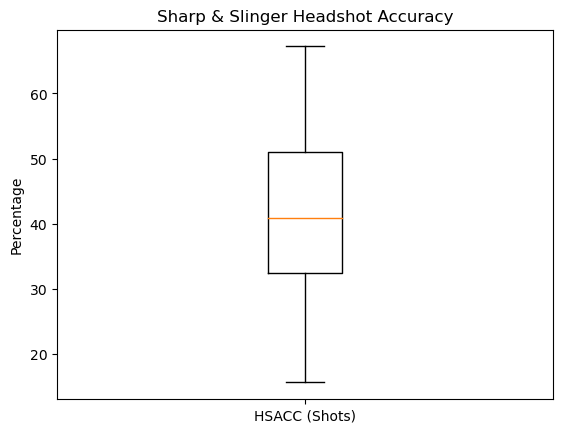

In [20]:
fig1, ax1 = plt.subplots()
# ax1.scatter(x=dps_acc_df['ACC'],y=dps_acc_df['HSACC (Hits)'])
# dps_acc_plot = ax1.boxplot(x=dps_acc_df['ACC'], positions = [1])
# dps_hsacc_plot = ax1.boxplot(x=dps_acc_df['HSACC (Shots)'], positions = [2])
dps_hsacc_plot = ax1.boxplot(x=dps_acc_df['HSACC (Shots)'], positions = [1
                                                                        ])
ax1.set_title('Sharp & Slinger Headshot Accuracy')
ax1.set_ylabel('Percentage')

plt.xticks([1], ['HSACC (Shots)'])

In [21]:
print("Headshot Accuracy Plot Statistics:")
print(f"  Lower Quartile (Q1): {dps_hsacc_plot['boxes'][0].get_ydata()[1]}")
print(f"  Median (Q2): {dps_hsacc_plot['medians'][0].get_ydata()[1]}")
print(f"  Upper Quartile (Q3): {dps_hsacc_plot['boxes'][0].get_ydata()[3]}")
print(f"  Interquartile Range (IQR): {dps_hsacc_plot['boxes'][0].get_ydata()[3] - dps_hsacc_plot['boxes'][0].get_ydata()[1]}")
print(f"  Lower Whisker: {dps_hsacc_plot['whiskers'][0].get_ydata()[1]}")
print(f"  Upper Whisker: {dps_hsacc_plot['whiskers'][1].get_ydata()[1]}")
print(f"  Outliers: {dps_hsacc_plot['fliers'][0].get_ydata()}")
print("")

dps_hsacc = dps_hsacc_plot['boxes'][0].get_ydata()[3]/100

Headshot Accuracy Plot Statistics:
  Lower Quartile (Q1): 32.426879167500005
  Median (Q2): 40.798135599999995
  Upper Quartile (Q3): 51.025
  Interquartile Range (IQR): 18.598120832499994
  Lower Whisker: 15.6274357
  Upper Whisker: 67.2
  Outliers: []



For now, I am choosing a value on the high end from this data set. I intend to return to this question with mixed sets of different players when modeling for different difficulties in the future, but for now I'm most interested in how far difficulty can be pushed for high level play. 

So, I will use the upper quartile values. This means that I am assuming **51.025%** of total shots fired are headshots for sharpshooters and slingers.

#### 6b. Command Accuracy

Next, the **commandos**. Once again, these are the percentages of total shots fired that impacted a zed in the head, (HSACC (Shots)).

([<matplotlib.axis.XTick at 0x2b53245b550>], [Text(1, 0, 'HSACC (Hits)')])

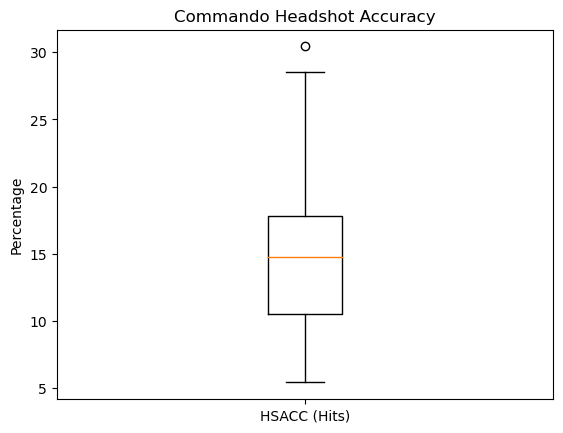

In [22]:
fig2, ax2 = plt.subplots()

mando_hsacc_plot = ax2.boxplot(x=mando_acc_df['HSACC (Shots)'], positions = [1])

ax2.set_title('Commando Headshot Accuracy')
ax2.set_ylabel('Percentage')

plt.xticks([1], ['HSACC (Hits)'])

In [23]:
print("Headshot Accuracy Plot Statistics:")
print(f"  Lower Quartile (Q1): {mando_hsacc_plot['boxes'][0].get_ydata()[1]}")
print(f"  Median (Q2): {mando_hsacc_plot['medians'][0].get_ydata()[1]}")
print(f"  Upper Quartile (Q3): {mando_hsacc_plot['boxes'][0].get_ydata()[3]}")
print(f"  Interquartile Range (IQR): {mando_hsacc_plot['boxes'][0].get_ydata()[3] - mando_hsacc_plot['boxes'][0].get_ydata()[1]}")
print(f"  Lower Whisker: {mando_hsacc_plot['whiskers'][0].get_ydata()[1]}")
print(f"  Upper Whisker: {mando_hsacc_plot['whiskers'][1].get_ydata()[1]}")
print(f"  Outliers: {mando_hsacc_plot['fliers'][0].get_ydata()}")
print("")

mando_hsacc = mando_hsacc_plot['boxes'][0].get_ydata()[3]/100

Headshot Accuracy Plot Statistics:
  Lower Quartile (Q1): 10.48850575
  Median (Q2): 14.75155279
  Upper Quartile (Q3): 17.82
  Interquartile Range (IQR): 7.33149425
  Lower Whisker: 5.41186393
  Upper Whisker: 28.52893456
  Outliers: [30.43478261]



Again, I'm going to use the upper quartile value, so our commando is assumed to have about **17.82%** of his rounds hit enemies in the head.

### 6c. Find _Weighted Damage Resistance Values_ 

Different enemies have different resistances to different weapons. For instance, fleshpounds are more resistant to handguns than rifles. This step uses the percentage of a given zed in the wave for the weight of that zed’s resistance value. 

##### If time, use tourney data for kills per wave.

In [24]:
# Skipping for now to get other things working

### 6d. *Zed Head Health Pool*

This is how much collective **Adjusted Head HP** is present for each zed in a given wave. As a reminder, the **Adjusted Head HP** is the zed's head health divided by the hitzone multiplier for its head.

The file imported here, the "ZedStats_HPMatrix," is just the Adjusted Head HP of every zed repeated 10 times for easy use in dataframe calculations.

In [25]:
ZedStats_HPMatrix = pd.read_csv('E:\College\FinalProjectData\ZedStats_HPMatrix.csv')
HP_Matrix_df = pd.DataFrame(data=ZedStats_HPMatrix)
HP_Matrix_df.head(2)

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,18.18,18.18,18.18,113.64,45.45,136.36,18.18,18.18,81.99,219.78,140.91,1440,1116.36,1560
1,18.18,18.18,18.18,113.64,45.45,136.36,18.18,18.18,81.99,219.78,140.91,1440,1116.36,1560


In [26]:
# mb_v0a, all waves
mb0a_by_zed = HP_Matrix_df * mb0a_df

mb0a_by_zed.head(2)

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
0,472.68,472.68,472.68,2272.80,1272.6,2727.20,509.04,472.68,1147.86,2197.80,1972.74,5760,0.0,3120
1,399.96,436.32,436.32,1590.96,1454.4,3272.64,545.40,509.04,1311.84,3076.92,2254.56,23040,0.0,21840


In [27]:
# mb_v0a, wave 1
mb0a_1_by_zed = mb0a_by_zed.iloc[0]
mb0a_wave1_pool=mb0a_1_by_zed.sum()

mb0a_wave1_pool

22870.760000000002

#### 6d. Conclusion
MB_v0a's wave 1 has about **22,871** adjusted Zed head HP

### 6e. *Zed Head Health Pool* for NVM_v1

This pool represents the upper bounds of where I'm going push the model. Once players have the firepower needed to clear this, they're fine.

In [28]:
# nvm_v1, all waves
nvm1_by_zed = HP_Matrix_df * nvm1_df

nvm1_by_zed.tail(2)

,Cyst,Alpha Clot,Slasher,Rioter,Gorefast,Gorefiend,Crawler,Stalker,Bloat,Husk,Siren,Scrake,Quarterpound,Fleshpound
8,0.0,327.24,236.34,4886.52,590.85,4636.24,509.04,363.60,2705.67,11208.78,5495.49,110880,0.0,65520
9,0.0,218.16,109.08,5454.72,818.10,4772.60,163.62,218.16,3279.60,12967.02,5777.31,120960,0.0,73320


In [29]:
# nvm_v1, wave 10
nvm1_10_by_zed = nvm1_by_zed.iloc[9]
# nvm1_10_by_zed

In [30]:
nvm1_10_pool = nvm1_10_by_zed.sum()
nvm1_10_pool

228058.37

#### 6e. Conclusion
NVM_v1's wave 10 has a monumental **228,058.37** points of adjusted Zed head HP

### 6f. Maximum Team Damage with Wave 1 Loadouts

In [31]:
# Setting up weapon damage variables
nine_cmd_dmg = int(weapons_df['Total Damage'][0])
ar15_hpr_dmg = int(weapons_df['Total Damage'][1])
bullpup_hpr_dmg = int(weapons_df['Total Damage'][2])
bullpup_cmd_dmg = int(weapons_df['Total Damage'][3])
scar_cmd_dmg = int(weapons_df['Total Damage'][4])
fnfal_cmd_dmg = int(weapons_df['Total Damage'][5])
nine_ss_dmg = int(weapons_df['Total Damage'][6])
winch_ss_dmg = int(weapons_df['Total Damage'][7])
ebr_ss_dmg = int(weapons_df['Total Damage'][8])
ebr1_ss_dmg = int(weapons_df['Total Damage'][9])
spx_ss_dmg = int(weapons_df['Total Damage'][10])
spx1_ss_dmg = int(weapons_df['Total Damage'][11])
spx2_ss_dmg = int(weapons_df['Total Damage'][12])
nine_gs_dmg = int(weapons_df['Total Damage'][13])
spx_gs_dmg = int(weapons_df['Total Damage'][14])
spx1_gs_dmg = int(weapons_df['Total Damage'][15])
spx2_gs_dmg = int(weapons_df['Total Damage'][16])
revol_gs_dmg = int(weapons_df['Total Damage'][17])
deag_gs_dmg = int(weapons_df['Total Damage'][18])

In [32]:
# REFERENCE LIST TO COPY AROUND
# nine_cmd_dmg = int(weapons_df['Total Damage'][0])
# ar15_hpr_dmg = int(weapons_df['Total Damage'][1])
# bullpup_hpr_dmg = int(weapons_df['Total Damage'][2])
# bullpup_cmd_dmg = int(weapons_df['Total Damage'][3])
# scar_cmd_dmg = int(weapons_df['Total Damage'][4])
# fnfal_cmd_dmg = int(weapons_df['Total Damage'][5])
# nine_ss_dmg = int(weapons_df['Total Damage'][6])
# winch_ss_dmg = int(weapons_df['Total Damage'][7])
# ebr_ss_dmg = int(weapons_df['Total Damage'][8])
# ebr1_ss_dmg = int(weapons_df['Total Damage'][9])
# spx_ss_dmg = int(weapons_df['Total Damage'][10])
# spx1_ss_dmg = int(weapons_df['Total Damage'][11])
# spx2_ss_dmg = int(weapons_df['Total Damage'][12])
# nine_gs_dmg = int(weapons_df['Total Damage'][13])
# spx_gs_dmg = int(weapons_df['Total Damage'][14])
# spx1_gs_dmg = int(weapons_df['Total Damage'][15])
# spx2_gs_dmg = int(weapons_df['Total Damage'][16])
# revol_gs_dmg = int(weapons_df['Total Damage'][17])
# deag_gs_dmg = int(weapons_df['Total Damage'][18])

Perks will spawn in with the following ammunition loads:

#### Commando

- AR15 HPR, 308 rounds
- 9mm (mando), 90 rounds

#### Gunslinger 1

- Dual 1858, 144 rounds
- 9mm (slinger), 90 rounds

#### Gunslinger 2

- Dual 1858, 144 rounds
- 9mm (slinger), 90 rounds

#### Sharpshooter 1

- Winchester, 117 rounds
- 9mm (sharp), 109 rounds

The following code calculates the max damage of each player's loadout and stores those values in an array. 

In [76]:
# Initialize the array for collecting together the team's damage
team_w1_full = np.empty(shape=(0))
team_w1_full

array([], dtype=float64)

In [77]:
# Commando, Wave 1
cmd_w1 = []
cmd_w1.append(nine_cmd_dmg*90) 
cmd_w1.append(ar15_hpr_dmg*308)
cmd_dmg_w1 = sum(cmd_w1)

team_w1_full = np.append(team_w1_full,cmd_w1)
team_w1_full

array([ 4230., 12012.])

In [78]:
# Gunslinger 1, Wave 1
gs1_w1 = [0,0]
gs1_w1[0] = nine_gs_dmg*90
gs1_w1[1] = revol_gs_dmg*144
gs1_dmg_w1 = sum(gs1_w1)

team_w1_full = np.append(team_w1_full,gs1_w1)
team_w1_full

array([ 4230., 12012.,  3420., 10800.])

In [79]:
# Gunslinger 2, Wave 1
gs2_w1 = [0,0]
gs2_w1[0] = nine_gs_dmg*90
gs2_w1[1] = revol_gs_dmg*144
gs2_dmg_w1 = sum(gs2_w1)

team_w1_full = np.append(team_w1_full,gs2_w1)
team_w1_full

array([ 4230., 12012.,  3420., 10800.,  3420., 10800.])

In [80]:
# Sharpshooter 1, Wave 1
ss1_w1 = [0,0]
ss1_w1[0] = nine_ss_dmg*109
ss1_w1[1] = winch_ss_dmg*117
ss1_dmg_w1 = sum(ss1_w1)

team_w1_full = np.append(team_w1_full,ss1_w1)
team_w1_full

array([ 4230., 12012.,  3420., 10800.,  3420., 10800.,  4905., 16848.])

In [81]:
# Sharpshooter 2, Wave 1
ss2_w1 = [0,0]
ss2_w1[0] = nine_ss_dmg*109
ss2_w1[1] = winch_ss_dmg*117
ss2_dmg_w1 = sum(ss2_w1)

team_w1_full = np.append(team_w1_full,ss2_w1)
team_w1_full

array([ 4230., 12012.,  3420., 10800.,  3420., 10800.,  4905., 16848.,
        4905., 16848.])

In [82]:
# Total Team Damage
Max_Team_Damage_w1 = sum(team_w1_full)
Max_Team_Damage_w1

88188.0

#### 6f. Conclusion
Through this process, we discover our team, if they had 100% accuracy at all times and the zeds didn't resist any damage, could deal an impressive **88,188** points of damage.

However, players are not perfect aim bots, and even aim bots might find themselves baffled by ragdoll physics in KF2 while trying to reach perfect accuracy. So, we proceed onward in our calculations.

### 6g. Max Team Damage after Weapon Resistances

In [67]:
# Skipped for now to accomplish other things
# Might roll this into 6f

# 8. Find the Max Damage per Player for a given wave. 
# This is [damage for every available bullet in a weapon]*[weighted resistance value] + the same for all their other weapons.

In [91]:
# This is the final array that will be spat out after the resistances.
# So, I need this variable name for now

team_w1_res = np.copy(team_w1_full)
team_w1_res

array([ 4230., 12012.,  3420., 10800.,  3420., 10800.,  4905., 16848.,
        4905., 16848.])

In [90]:
Max_Team_Damage_w1_RES = sum(team_w1_res)
Max_Team_Damage_w1_RES

88188.0

### 6h. Max Team Damage after HSACC

Now, we apply the headshot accuracies we found waaaaay back in 6a and 6b.
We found dps_hsacc to be **51.025%** and mando_hsacc to be **17.82%**. Now, we need to modify our damage totals appropriately so we know how many shots players are actually going to land.

At the end, we will also createan array with the percentage of the team's total damage that each weapon represents. This will be used to weight the ammunition expenditure from each weapon.

In [84]:
team_w1_hsacc = np.copy(team_w1_res)
team_w1_hsacc

array([ 4230., 12012.,  3420., 10800.,  3420., 10800.,  4905., 16848.,
        4905., 16848.])

In [85]:
team_w1_hsacc[:2]*=mando_hsacc
team_w1_hsacc[2:]*=dps_hsacc
team_w1_hsacc

array([ 753.786  , 2140.5384 , 1745.055  , 5510.7    , 1745.055  ,
       5510.7    , 2502.77625, 8596.692  , 2502.77625, 8596.692  ])

In [87]:
Max_Team_Damage_w1_HSACC = sum(team_w1_hsacc)
Max_Team_Damage_w1_HSACC

39604.770899999996

In [72]:
# Percent of overall damage dealt by each weapon, used to weight ammo expenditure
team_w1_hsacc_perc = team_w1_hsacc / sum(team_w1_hsacc)
team_w1_hsacc_perc

array([0.01903271, 0.05404749, 0.04406174, 0.13914233, 0.04406174,
       0.13914233, 0.06319381, 0.21706203, 0.06319381, 0.21706203])

#### 6h. Max Team Damage after HSACC Conclusion

Now, we find that our team is expected to do a much more modest **39,605** points of damage, and we have percentages of that total that each weapon is expected to do.

### 6i. The Story So Far
So, we've done a ton of math and I would not blame anyone for getting lost, so it's time for some visuals! The following bar plot displays, from left to right:
1. NVM_v1's wave 10 adjusted zed head HP pool. 
 - *nvm1_10_pool*
2. The team's total possible damage if they were perfectly accurate. 
 - *Max_Team_Damage_w1*
3. The team's total possible damage if they were perfectly accurate but zed resistances were applied. 
 - *Max_Team_Damage_w1_RES*
4. The team's expected damage output after resistances and accuracy are accounted for. 
 - *Max_Team_Damage_w1_HSACC*
5. MB_v0a's wave 1 adjusted zed head HP pool, 
 - *mb0a_wave1_pool*

In [100]:
bar_labels_6i = ['NVM_v1 w10','Team Max', 'Resisted Max','HSACC Max','MB_v0a w1']
bar_labels_6i

['NVM_v1 w10', 'Team Max', 'Resisted Max', 'HSACC Max', 'MB_v0a w1']

In [101]:
bar_6i_values = [nvm1_10_pool,Max_Team_Damage_w1,Max_Team_Damage_w1_RES,Max_Team_Damage_w1_HSACC,mb0a_wave1_pool]
bar_6i_values

[228058.37, 88188.0, 88188.0, 39604.770899999996, 22870.760000000002]

<BarContainer object of 5 artists>

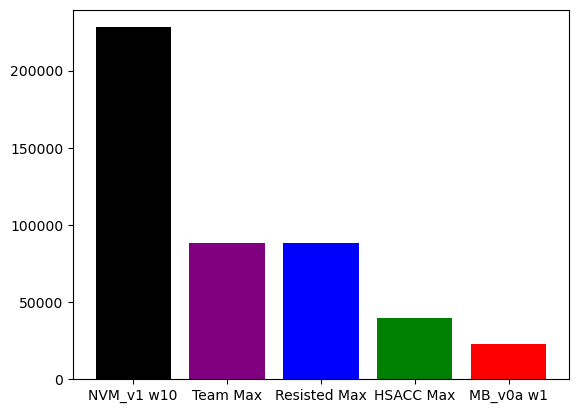

In [102]:
fig3, ax3 = plt.subplots()
ax3.bar(bar_labels_6i,bar_6i_values,color=['black','purple','blue','green','red'])

#### 6i. The Story So Far Conclusion
So, we can see that we have enough damage to complete the first wave of mb_v0a available to the team, but none of our damage budgets are anywhere near the NVM_v1 wave 10 cutoff.

### 6j. Distributing the damage
Now, we know how much damage the team is expected to deal, and roughly how much is expected to come from each of their weapons. Now, it's time to figure out how  many rounds we used and what we have left to us.

First, we figure out how much damage the team did not need.

13.	Subtract _Adjusted Zed Head Health Pool_ and _Expected Team Damage_.
14.	__**BAR PLOT**__ of _Max Damage for Team_ vs. _Expected Team Damage_ vs. _Adjusted Zed Head Health Pool_.
15.	Use the damage per perk data, either per wave or final in the matches, to create a _Damage Pool Weight_ that represents each perk’s expected contribution to the total damage. This helps account for target priority, where the mando in particular is firing at many low health targets and largely ignoring high health targets.
16.	Divide the spent damage among the players using the _Damage Pool Weight__ and their weapons to get _Damage Per Player-_ and spread across their weapons to get _Expected Ammunition Expenditure_. (This will weight 9mm higher than actual play. That is an acceptable tradeoff)
17.	If a wave total wants too much damage from a player, such as a mando not having enough ammo to deal the expected damage, distribute the overflow among the other players equally.
18.	Use the _Damage per Player_ and their HSACC% to find their ammo expenditure
19.	Find the _Minimum Dosh Total_, which is the minimum amount of money the team can earn if every zed is killed with no teamwork.
20.	Divide the _Minimum Dosh Total_ among the players. Buy, fill, sell, & upgrade weapons from the model build orders.
21.	Use any leftover money from players to buy ammo, freeze grenades, & upgrades for other players (this will have to be by hand. Writing an optimization algorithm to maximize team damage output is beyond my current skills).
22.	Use any leftover money to buy grenades for non-sharpshooters
23.	Save any remaining money for future use
24.	Repeat with next wave
25.	_**LINE PLOT**_ of team money per wave.
26.	Conglomerate _**LINE PLOT**_ of team money per wave for different cycles.
27.	When _Expected Team Damage Pool_ is greater than _NVM_v1 w10 Adjusted Head Health Pool_, cut the model off. Players, if they play well, can deal with basically any number of zeds in waves after this point. It is the "Git Gud" Threshold.